In [1]:
import os 
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from general_plot import *



model_name = model_name_list[0] # Elevator: 
all_mutants = list_dir(join_path("merged_mutants", f'{system_map[model_name][0]}'))

print(all_mutants)



['20', '18', '27', '9', '0', '11', '7', '16', '6', '28', '17', '1', '10', '19', '26', '8', '21', '24', '23', '4', '15', '3', '12', '2', '13', '5', '14', '22', '25']


In [2]:
bes_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_bes_loops.csv'))
rand_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_random_loops.csv'))

bes_no_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_bes_no_loops.csv'))
rand_no_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_random_no_loops.csv'))

dfs = (bes_lo_k_csv, rand_lo_k_csv, bes_no_lo_k_csv, rand_no_lo_k_csv)

In [3]:
#calculate mutation score for each model = killed / all mutants
ms_bes_l = get_mutation_score(bes_lo_k_csv, all_mutants)
ms_rand_l = get_mutation_score(rand_lo_k_csv, all_mutants)
ms_bes_no_l = get_mutation_score(bes_no_lo_k_csv, all_mutants)
ms_rand_no_l = get_mutation_score(rand_no_lo_k_csv, all_mutants)

print(f'mutation score for bes_loop in model {model_name}: {ms_bes_l[1]} of {ms_bes_l[2]} = {ms_bes_l[0]*100}%')
print(f'mutation score for rand_loop in model {model_name}: {ms_rand_l[1]} of {ms_rand_l[2]} = {ms_rand_l[0]*100}%')
print(f'mutation score for bes_no_loop in model {model_name}: {ms_bes_no_l[1]} of {ms_bes_no_l[2]} = {ms_bes_no_l[0]*100}%')                    
print(f'mutation score for rand_no_loop in model {model_name}: {ms_rand_no_l[1]} of {ms_rand_no_l[2]} = {ms_rand_no_l[0]*100}%')




mutation score for bes_loop in model ElevatorModel: 9 of 29 = 31.03448275862069%
mutation score for rand_loop in model ElevatorModel: 9 of 29 = 31.03448275862069%
mutation score for bes_no_loop in model ElevatorModel: 7 of 29 = 24.137931034482758%
mutation score for rand_no_loop in model ElevatorModel: 9 of 29 = 31.03448275862069%


In [4]:
m_lists = get_killed_mutant_all(dfs)
(bes_m_l_list, rand_m_l_list, bes_m_no_l_list, rand_m_no_l_list) = m_lists 

title = f"The different algorithms' performance on killed mutant for {model_name_to_view_list[0]}"
d_map = {
    'bar_width' : 0.5, 
    'x_distance': 3,
    'fig_width' : 15,
    'fig_hight' : 5,
    'x_lim' : 25,
    'y_lim' : 200,
    
    'x_label': 'Killed mutant number', 
    'y_label': 'UnKnown', 
    'title': f"The different algorithms' performance on killed mutant for {model_name_to_view_list[0]}",
    
    'bes_l_label': 'BESL',
    'random_l_label': 'RS (cor. to BESL)',
    'bes_no_l_label': 'BESnL',
    'random_no_l_label': 'RS (cor. to BESnL)',
    
    'model_name': model_name, 
    'comp_type' : "unknown"
    
    
}




old_labels: ['0', '1', '3', '20', '21', '22', '23', '25', '26']
mutant 25 not_found
mutant 26 not_found
over_bound_list: ({('26', 190, 1, 0, 6)}, {'26'})
*****************************
\begin{table}[actual_tests]
\begin{tabular}{|c|c|c|c|c|}
\hline
& BES (Loops) & Random (Loops) & BES (no self loop) & Random (no self loop) \\ \hline
26 & 190    & 1         & TIMEOUT       & 6          \\ \hline
\end{tabular}
\end{table}
*****************************

labels: ['0', '1', '3', '20', '21', '22', '23', '25']
mutant 25 not_found
bes_l data: ([4, 4, 4, 4, 1, 4, 5, 3], [0, 0, 0, 0, 0, 0, 0, 0])
rand_l data: ([1, 1, 1, 1, 1, 1, 1, 21], [0, 0, 0, 0, 0, 0, 0, 0])
bes_no_l data: ([4, 4, 4, 4, 1, 4, 5, 0], [0, 0, 0, 0, 0, 0, 0, 120])
rand_no_l data: ([1, 1, 1, 1, 1, 1, 1, 2], [0, 0, 0, 0, 0, 0, 0, 0])


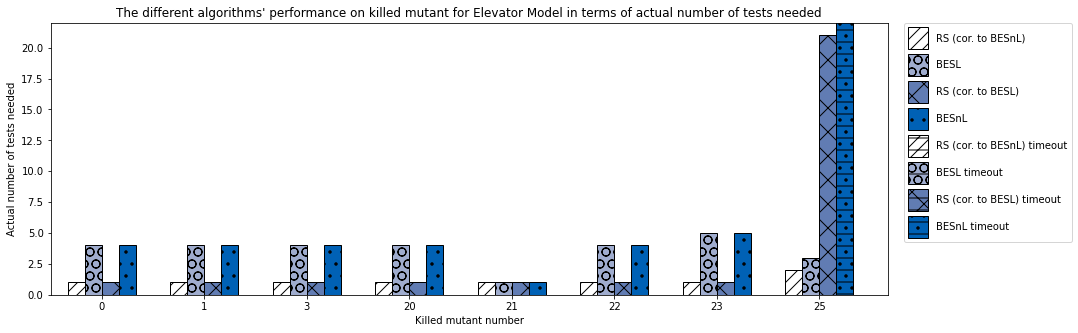

In [5]:

#################################
## Manually:
#################################

# actual_size

# desired_mutants = m_lists[0][0:6]
desired_mutants = m_lists[1]

old_labels = desired_mutants
print(f'old_labels: {old_labels}')

creteria =  'actual_tests'# 'time_taken' # 'actual_tests'

c_lists = get_cretiera_all_desired_m(dfs, desired_mutants, creteria, 0, 120)
# (bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists

over_bound_list = get_over_bound_element(c_lists, desired_mutants, 100)
print(f'over_bound_list: {over_bound_list}')
latex = latex_table_maker(creteria, over_bound_list[0])
print("*****************************")
print(latex)
print("*****************************")
print()

new_desired_mutants = extract_desired_without_over_bound(desired_mutants, over_bound_list[1])
labels = new_desired_mutants
print(f'labels: {labels}')

c_lists = get_cretiera_all_desired_m(dfs, new_desired_mutants, creteria, 0, 120)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists




d_map['y_label'] = "Actual number of tests needed"
d_map['comp_type'] = creteria
d_map['x_lim'] = 23
d_map['y_lim'] = 22
d_map['title'] = f"{title} in terms of {d_map['y_label'].lower()}"


plot_4_bars(labels, c_lists, d_map)


labels: ['0', '1', '3', '20', '21', '22', '23', '25', '26']
mutant 25 not_found
mutant 26 not_found
bes_l data: ([1.2192566394805908, 1.3348569869995115, 2.510087251663208, 1.218770980834961, 1.233520269393921, 1.2963662147521973, 1.1178669929504397, 2.272466897964477, 3.5463578701019287], [0, 0, 0, 0, 0, 0, 0, 0, 0])
rand_l data: ([1.1101810932159424, 0.9049017429351808, 0.7674558162689209, 0.8359580039978027, 0.8215742111206055, 0.7747330665588379, 0.8739848136901855, 0.7086539268493652, 0.6738531589508057], [0, 0, 0, 0, 0, 0, 0, 0, 0])
bes_no_l data: ([2.5222866535186768, 1.6476762294769287, 1.547658920288086, 2.161674976348877, 1.7297847270965576, 1.91019606590271, 2.204694986343384, 0, 0], [0, 0, 0, 0, 0, 0, 0, 120, 120])
rand_no_l data: ([2.229779958724976, 1.867422103881836, 2.01725697517395, 1.1801369190216064, 1.1468040943145752, 1.1461570262908936, 1.1526787281036377, 1.1566219329833984, 1.3681612014770508], [0, 0, 0, 0, 0, 0, 0, 0, 0])


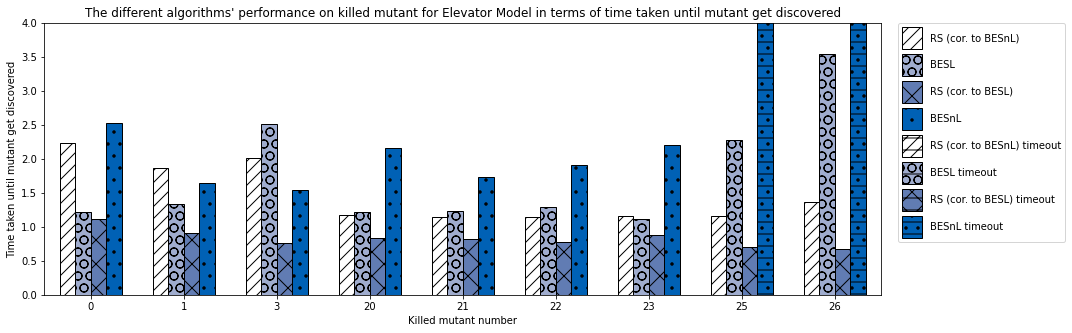

In [9]:
# time_requierd

# desired_mutants = m_lists[0][0:6]
desired_mutants = m_lists[0]


labels = desired_mutants
print(f'labels: {labels}')

creteria =  'time_taken'# 'time_taken' # 'actual_tests'

c_lists = get_cretiera_all_desired_m(dfs, desired_mutants, creteria, 0, 120)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists

d_map['comp_type'] = creteria

d_map['y_label'] = "Time taken until mutant get discovered"

# 'bar_width' : 0.5, 
#     'x_distance': 3,
#     'fig_width' : 10,
#     'fig_hight' : 5,
d_map['x_lim'] = 25.5
d_map['y_lim'] = 4
d_map['title'] = f"{title} in terms of {d_map['y_label'].lower()}"

plot_4_bars(labels, c_lists, d_map)



mutant 25 not_found
mutant 26 not_found


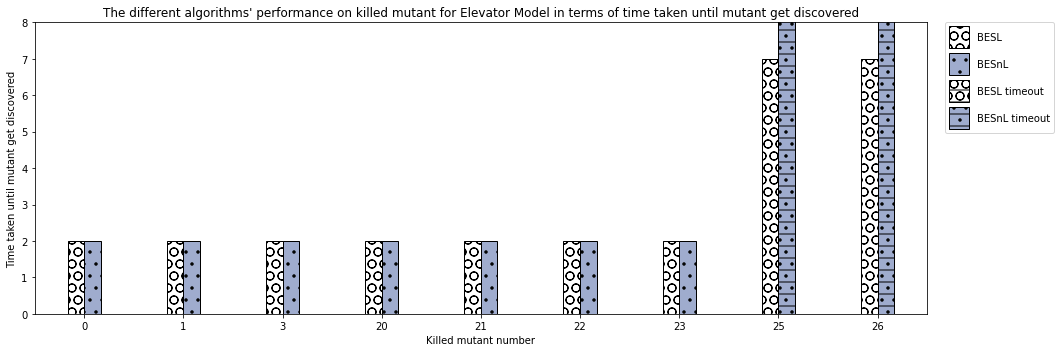

In [7]:
# depth
creteria = 'depth'
c_lists = get_cretiera_only_2(dfs, desired_mutants, creteria, 0, 120)
(bes_lo_c, bes_no_lo_c) = c_lists

d_map['comp_type'] = creteria

d_map['y_label'] = "Time taken until mutant get discovered"

# 'bar_width' : 0.5, 
#     'x_distance': 3,
#     'fig_width' : 10,
#     'fig_hight' : 5,
#     'x_lim' : 25,
d_map['y_lim'] = 8
d_map['title'] = f"{title} in terms of {d_map['y_label'].lower()}"


plot_2_bars(labels, c_lists, d_map)

